**Zhuangyuan Fan z5432930 Ass1**

***Part 1. Topic Classification***


Question 1

- a: if we only use `r[^\w\s]`, it will let some symbol like `,.?..` will be remove. Then this may increase some sentence check errors during training time.

- b: When we use `train_test_split`, an unfavorable split, such as one containing many outliers in the train data, will cause the model to fall short of expectations. If we use k-fold cross-validation during training can improve the model's accuracy rate and decrease risk of overfitting.



In [4]:
# part 2
import pandas as pd
df = pd.read_table("dataset.tsv")
print(df.head())

                            artist_name         track_name  release_date  \
0                                loving  the not real lake          2016   
1                               incubus    into the summer          2019   
2                             reignwolf           hardcore          2016   
3                  tedeschi trucks band             anyhow          2016   
4  lukas nelson and promise of the real  if i started over          2017   

   genre                                             lyrics      topic  
0   rock  awake know go see time clear world mirror worl...       dark  
1   rock  shouldn summer pretty build spill ready overfl...  lifestyle  
2  blues  lose deep catch breath think say try break wal...    sadness  
3  blues  run bitter taste take rest feel anchor soul pl...    sadness  
4  blues  think think different set apart sober mind sym...       dark  


In [5]:
#This creates five-fold method
from sklearn.model_selection import StratifiedKFold
fiveFold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

lyric = df['lyrics']
tp = df['topic']
print(lyric.shape)
print(tp.shape)

(1500,)
(1500,)


In [6]:
# This is two methods for propressing text
def methodT_a(text):
    out = text.str.lower()
    out = out.replace(r"[^\w\s{P}]", '', regex = True)
    return out

def methodT_b(text):
    out = text.str.lower()
    out = out.replace(r"[^A-Za-z0-9\u4e00-\u9fff\s\.,'\-]", '', regex = True)
    return out

In [7]:
#This part is created naive_bayes list, MNB and BNB
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
Baive = [
    ('MNB',  MultinomialNB()),
    ('BNB', BernoulliNB())
]


In [8]:
# This part is created CountVectorizer list
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk

stemmer = PorterStemmer()
def stem_tokenizer(text):
    tokens = word_tokenize(text.lower())
    return [stemmer.stem(t) for t in tokens]

def stem_tokenizer_simple(text):
    tokens = text.lower().split()         
    return [stemmer.stem(t) for t in tokens]

#have 4 different 
allCounV = {
    'default':CountVectorizer(),
    'with_token': CountVectorizer(
        tokenizer=stem_tokenizer_simple
    ),
    'Stop_word': CountVectorizer(
         stop_words='english'
    ),
    'Stop_wordWithToken': CountVectorizer(
         tokenizer=stem_tokenizer_simple,
         stop_words='english'
    )}


## Question 2

In this part, I implement two different methods for preprocessing text:`method_A` and `method_B`. In `method_A` is based on the Week2TUT coding, whereas `method_B` includes additional characters that are preserved during preprocessing. Then I apply two different Naive Bayes models: `MNB` and `BNB`. Finally, I create a `ContVectorizer` list using `sklearn` and `nltk` packages. I think the best preprocessing method is `method_b`,`MNB` and `default` in the CountVectorizer list.

In [10]:
#This is part 2 coding
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
textPrep = {
    'T_a': methodT_a,
    'T_b': methodT_b
}
results = []
scoring = ['accuracy', 'precision_weighted', 'f1', 'f1_micro']

#main function 
for counName,ConvMethod in allCounV.items():
    for texName, fn in textPrep.items():
        x_pre = fn(lyric)
        for basivName, basisMethod in Baive:
            pipe = Pipeline([
                ('vect', ConvMethod),
                ('clf', basisMethod)
            ])
            #use cross_validate to find each data result
            scores = cross_validate(
                pipe,
                x_pre, 
                tp,         
                cv= fiveFold,
                scoring=['accuracy', 'precision_weighted', 'f1_weighted', 'f1_micro'],
            )
    
            results.append({
                'counname': counName,
                'preproc': texName,
                'classifier': basivName,
                'acc_mean':    scores['test_accuracy'].mean(),
                'prec_mean':   scores['test_precision_weighted'].mean(),
                'f1_w_mean':   scores['test_f1_weighted'].mean(),
                'f1_micro_mean': scores['test_f1_micro'].mean(),
            })

F:\anaconda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\anaconda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\anaconda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\anaconda\anaconda3\Lib\site-packages\sklearn\m

## Question 3
In this question, I use `accuracy`, `precision`, `f1` and `f1-micro` as criteria for evaluation, as they are very common in machine learning and AI. When encountering unbalanced data, `accuracy` will be misleading in unbalanced dataset, `precision` will also be affected, particularyly in small datasets where the minority class may be underrepresented. `F1` is generally more robust in such cases because it is calculated per clarticularlypass and then averaged, reducing the impact of imbalance. `F1-micro` is similary to `accuracy`. In balanced datasets, both can effectively represent the performance of the model

In [12]:
finalResult = pd.DataFrame(results).sort_values('acc_mean', ascending=False)
print(finalResult)

              counname preproc classifier  acc_mean  prec_mean  f1_w_mean  \
0              default     T_a        MNB  0.808000   0.817355   0.801585   
2              default     T_b        MNB  0.807333   0.816643   0.800840   
4           with_token     T_a        MNB  0.804000   0.812138   0.798777   
6           with_token     T_b        MNB  0.802667   0.811089   0.797435   
10           Stop_word     T_b        MNB  0.799333   0.806773   0.790624   
8            Stop_word     T_a        MNB  0.798667   0.807350   0.789899   
14  Stop_wordWithToken     T_b        MNB  0.794667   0.801581   0.786407   
12  Stop_wordWithToken     T_a        MNB  0.793333   0.800305   0.785141   
7           with_token     T_b        BNB  0.539333   0.618245   0.489657   
1              default     T_a        BNB  0.538000   0.570383   0.479328   
5           with_token     T_a        BNB  0.538000   0.617090   0.487973   
3              default     T_b        BNB  0.537333   0.569171   0.479205   

From the table above and below, we can observe that `MNB` performed better than `BNB` in terms of the classifier selection. Additionally, the default configuration of `countVectorize`(without adding any data or parameters) the best performance. Finally,  in pre-processing, the method of tut2 (`method_a`) was better than `method_b`. This may be due to the fact that the latter preserves more noise—that is, words that are not necessarily relevant keywords.

              counname preproc classifier  acc_mean  prec_mean  f1_w_mean  \
0              default     T_a        MNB  0.808000   0.817355   0.801585   
2              default     T_b        MNB  0.807333   0.816643   0.800840   
4           with_token     T_a        MNB  0.804000   0.812138   0.798777   
6           with_token     T_b        MNB  0.802667   0.811089   0.797435   
10           Stop_word     T_b        MNB  0.799333   0.806773   0.790624   
8            Stop_word     T_a        MNB  0.798667   0.807350   0.789899   
14  Stop_wordWithToken     T_b        MNB  0.794667   0.801581   0.786407   
12  Stop_wordWithToken     T_a        MNB  0.793333   0.800305   0.785141   
7           with_token     T_b        BNB  0.539333   0.618245   0.489657   
1              default     T_a        BNB  0.538000   0.570383   0.479328   

    f1_micro_mean  
0        0.808000  
2        0.807333  
4        0.804000  
6        0.802667  
10       0.799333  
8        0.798667  
14       0.7

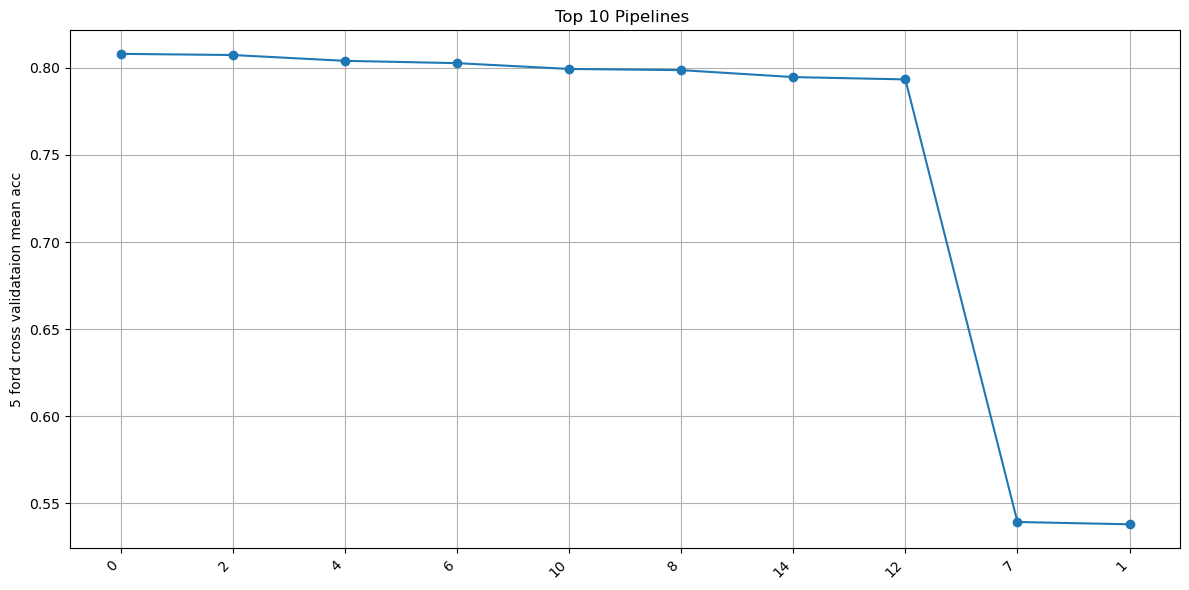

In [14]:
import matplotlib.pyplot as plt
import numpy as np
top10 = finalResult[:10]
print(top10)
labels = top10.index.tolist()
x = np.arange(len(labels))        
plt.figure(figsize=(12, 6))
plt.plot(
    x,
    top10['acc_mean'],             
    # yerr=top10['acc_std'],         
    marker='o',
    linestyle='-'
)

plt.xticks(x, labels, rotation=45, ha='right') 
plt.ylabel('5 ford cross validataion mean acc')
plt.title('Top 10 Pipelines ')
plt.tight_layout()
plt.grid(True)
plt.show()


## Question 4
In this question, I select the best-performing configuration from the results of `Question 3`. I then choose two different `countVectorize` configurations to demonstrate that the same outcome can be reproduced

In [16]:
# I choose 300, 500, 700, 1000, 1500, 2000 to find which is best n
max_n = [300,500, 700, 1000, 1500, 2000]
records = []
xInMAXN = methodT_a(lyric)

allCounVCWithNfeat = {
    'default': {},
    'with_token': {
        'tokenizer':stem_tokenizer_simple,
    }
}


for N in max_n:
    for Vname, params in allCounVCWithNfeat.items():
        vect = CountVectorizer(max_features = N, **params)
        pipe = Pipeline([
            ('vect', vect),
            ('clf',  MultinomialNB())
        ])
    
        scores = cross_validate(
            pipe,
            xInMAXN, 
            tp,
            cv=fiveFold,
            scoring='accuracy',
            return_train_score=False
        )
    
        mean_acc = scores['test_score'].mean()
        std_acc  = scores['test_score'].std()
        records.append({
            'vectName': Vname,
            'max_features': N,
            'classifier': "MNB",
            'mean_acc': mean_acc,
            'std_acc': std_acc
        })

resN = pd.DataFrame(records)

F:\anaconda\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
F:\anaconda\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
F:\anaconda\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
F:\anaconda\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
F:\anaconda\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
F:\anaconda\anaconda3\Lib\site-packages\sklearn\feature_extr

In [17]:
resNWithNoASC = pd.DataFrame(resN).sort_values('mean_acc',ascending=False)
print(resNWithNoASC)



      vectName  max_features classifier  mean_acc   std_acc
2      default           500        MNB  0.880000  0.019777
3   with_token           500        MNB  0.876000  0.023981
4      default           700        MNB  0.874000  0.017563
5   with_token           700        MNB  0.869333  0.019709
0      default           300        MNB  0.868667  0.024368
1   with_token           300        MNB  0.866000  0.026949
7   with_token          1000        MNB  0.854667  0.012220
8      default          1500        MNB  0.846667  0.011155
6      default          1000        MNB  0.846000  0.016653
9   with_token          1500        MNB  0.837333  0.009978
10     default          2000        MNB  0.836667  0.017764
11  with_token          2000        MNB  0.833333  0.019437


## Part 1 question 5  

In this question, I set `max_features = 500`, based on the findings from `question 4`, where the best performance was observed when `n =500`. For this question, I consulted online sources and found 6 commonly recommended classification methods there are: `Logistic Regression`, `Decision Tree`, `Random Forest`, `Support Vector Machine(SVM)`, `Naive Bayes` and `KNN`. For ` Logistic Regression` and `Support Vectore Machine(SVM)` were not considered, due to they require adding more data and modifications to the test code. `Rand Forest` was excluded because it needs to spend a lot of time, and performance was inconsistent. As a result, I will choose `KNN` method in this question. Although I experimented with the Decision Tree method, it showed poor performance (the best result will be shown below).

The website link:
`https://www.geeksforgeeks.org/machine-learning/top-6-machine-learning-algorithms-for-classification/`

In [19]:
from sklearn.neighbors import KNeighborsClassifier 

# from sklearn.tree import DecisionTreeClassifier

resultsKNN = []
knnN= [ 5,10 ,20]
for n in knnN:
    
    knnModel = KNeighborsClassifier (n_neighbors = n)
    # deTree = DecisionTreeClassifier(  criterion='entropy', max_depth = 500, random_state = 42)
    

    for counName,ConvMethod in allCounV.items(): 
        for texName, fn in textPrep.items():
            x_pre = fn(lyric)
            
            pipe = Pipeline([
                ('vect', ConvMethod),
                ('clf', knnModel) # if went to test deTree change knnModel to deTree 
            ])
            scores = cross_validate(
                pipe,
                x_pre, 
                tp,         
                cv= fiveFold,
                scoring=['accuracy', 'precision_weighted', 'f1_weighted', 'f1_micro'],
                # return_train_score=False
            )
    
            resultsKNN.append({
                'counname': counName,
                'preproc': texName,
                'n': n,
                'classifier': 'KNN',
                'acc_mean':    scores['test_accuracy'].mean(),
                'prec_mean':   scores['test_precision_weighted'].mean(),
                'f1_w_mean':   scores['test_f1_weighted'].mean(),
                'f1_micro_mean': scores['test_f1_micro'].mean(),
            })

F:\anaconda\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
F:\anaconda\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
F:\anaconda\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
F:\anaconda\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
F:\anaconda\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
F:\anaconda\anaconda3\Lib\site-packages\sklearn\feature_extr

In [20]:
finalResultKNN = pd.DataFrame(resultsKNN).sort_values('acc_mean', ascending=False)
# add deTree best one: 6  Stop_wordWithToken  T_a   deTree  0.542667  0.016111   0.540067   0.537349   0.542667  
print(finalResultKNN)

              counname preproc   n classifier  acc_mean  prec_mean  f1_w_mean  \
23  Stop_wordWithToken     T_b  20        KNN  0.627333   0.705204   0.617259   
22  Stop_wordWithToken     T_a  20        KNN  0.627333   0.705311   0.617318   
19          with_token     T_b  20        KNN  0.624667   0.709182   0.614963   
18          with_token     T_a  20        KNN  0.624667   0.708906   0.614836   
16             default     T_a  20        KNN  0.617333   0.707399   0.609100   
17             default     T_b  20        KNN  0.616667   0.706944   0.608376   
21           Stop_word     T_b  20        KNN  0.612000   0.695163   0.601576   
20           Stop_word     T_a  20        KNN  0.612000   0.695163   0.601576   
14  Stop_wordWithToken     T_a  10        KNN  0.606000   0.660746   0.604170   
15  Stop_wordWithToken     T_b  10        KNN  0.606000   0.660746   0.604170   
10          with_token     T_a  10        KNN  0.602667   0.670147   0.601302   
11          with_token     T

In [21]:
#due to above n_neighbors more big performance more better then I will test n_neighbors = 100
knnModel = KNeighborsClassifier (n_neighbors = 100)
    # deTree = DecisionTreeClassifier(  criterion='entropy', max_depth = 500, random_state = 42)
    
result100 = []
for counName,ConvMethod in allCounV.items(): 
    for texName, fn in textPrep.items():
        x_pre = fn(lyric)
        
        pipe = Pipeline([
            ('vect', ConvMethod),
            ('clf', knnModel) # if went to test deTree change knnModel to deTree 
        ])
        scores = cross_validate(
            pipe,
            x_pre, 
            tp,         
            cv= fiveFold,
            scoring=['accuracy', 'precision_weighted', 'f1_weighted', 'f1_micro'],
            # return_train_score=False
        )

        result100.append({
            'counname': counName,
            'preproc': texName,
            'n': 100,
            'classifier': 'KNN',
            'acc_mean':    scores['test_accuracy'].mean(),
            'prec_mean':   scores['test_precision_weighted'].mean(),
            'f1_w_mean':   scores['test_f1_weighted'].mean(),
            'f1_micro_mean': scores['test_f1_micro'].mean(),
        })

F:\anaconda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\anaconda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\anaconda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\anaconda\anaconda3\Lib\site-packages\sklearn\m

In [22]:
# print(result100)

result100pd = pd.DataFrame(result100)
print(result100pd)

             counname preproc    n classifier  acc_mean  prec_mean  f1_w_mean  \
0             default     T_a  100        KNN  0.456667   0.569735   0.378379   
1             default     T_b  100        KNN  0.456667   0.569735   0.378379   
2          with_token     T_a  100        KNN  0.473333   0.603260   0.399468   
3          with_token     T_b  100        KNN  0.473333   0.603260   0.399468   
4           Stop_word     T_a  100        KNN  0.472667   0.606412   0.401157   
5           Stop_word     T_b  100        KNN  0.472667   0.606412   0.401157   
6  Stop_wordWithToken     T_a  100        KNN  0.486667   0.626746   0.417015   
7  Stop_wordWithToken     T_b  100        KNN  0.486667   0.626746   0.417015   

   f1_micro_mean  
0       0.456667  
1       0.456667  
2       0.473333  
3       0.473333  
4       0.472667  
5       0.472667  
6       0.486667  
7       0.486667  


From the above results, the highest accuracy of `KNN` is 0.627 when `n_neighbors` is 20. We can observe that increasing the value of `n_neighbor` initially improves performance. However, when the value reaches 100, the performance was very bad.  In addition,enhanced text preprocessing appears to improve model performance. For example, `method_b`, which retains more words, allows the `KNN` to focus on finer details. Similarly, the  `Stop_wordWithToken's` configuration in `countVectorize `contributes to improved results. However, the performance of KNN still does not surpass that of `MNB`. Therefore, I will use the MNB model in the next question.

## Part 2 question 1
In this question, I will explain all coding steps in detail and apply the best-performing method identified in the previous question.

In [25]:
# part 2 questio 1 best one model from before part
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, f1_score

resultsP2 = []

scoring = ['accuracy', 'precision_weighted', 'f1', 'f1_micro']
bestCounv = CountVectorizer(
     max_features=500 
)
week3 = df[:751].copy()
week4 = df[751:1001].copy()
x_best = methodT_a(week3['lyrics'])
# x_best 
y_best = week3['topic']

Bestpipe = Pipeline([
    ('vect', bestCounv),
    ('clf', MultinomialNB())
])

Bestpipe.fit(x_best,y_best)

preData = methodT_a(week4['lyrics'])
pre_topic = Bestpipe.predict(preData)
week4['pre_topic'] = pre_topic
print(pre_topic.shape)
accuracy_w4 = accuracy_score(week4['topic'], pre_topic )
precision_w4 =precision_score(week4['topic'], pre_topic, average='weighted')
f1_w4 = f1_score(week4['topic'], pre_topic, average='weighted')
print(f" accuracy for prediction {accuracy_w4}")
print(f" precision for prediction {precision_w4}")
print(f" f1 scroe for prediction {f1_w4}")

# The above code is use model to prediction each song's topic in week4

# Part real 2, I use the topic.unique find this 
topicAll = ['dark' ,'lifestyle' ,'sadness', 'emotion', 'personal']
tfi ={}

predic_Topic_W3 =  Bestpipe.predict(x_best)
week3['pre_topic'] = predic_Topic_W3
#create different topic's tf-idf vec
for topic in topicAll:
    document = week3.loc[week3['pre_topic'] == topic, 'lyrics']
    print(topic)
    print(document.shape)
    tf = TfidfVectorizer(max_features=500)

    x_topic = tf.fit_transform(document)
    # tf.get_feature_nams_out()
    tfi[topic] = {
        'vectorize':tf,
        'tf_matrix': x_topic
    }

print(tfi)

(250,)
 accuracy for prediction 0.808
 precision for prediction 0.8125697213584537
 f1 scroe for prediction 0.8077396156534546
dark
(245,)
lifestyle
(90,)
sadness
(186,)
emotion
(43,)
personal
(187,)
{'dark': {'vectorize': TfidfVectorizer(max_features=500), 'tf_matrix': <245x500 sparse matrix of type '<class 'numpy.float64'>'
	with 6132 stored elements in Compressed Sparse Row format>}, 'lifestyle': {'vectorize': TfidfVectorizer(max_features=500), 'tf_matrix': <90x500 sparse matrix of type '<class 'numpy.float64'>'
	with 2284 stored elements in Compressed Sparse Row format>}, 'sadness': {'vectorize': TfidfVectorizer(max_features=500), 'tf_matrix': <186x500 sparse matrix of type '<class 'numpy.float64'>'
	with 4775 stored elements in Compressed Sparse Row format>}, 'emotion': {'vectorize': TfidfVectorizer(max_features=500), 'tf_matrix': <43x500 sparse matrix of type '<class 'numpy.float64'>'
	with 1153 stored elements in Compressed Sparse Row format>}, 'personal': {'vectorize': TfidfVec

In [26]:
user1 = pd.read_table("user1.tsv")
print(user1)

user1_profiles = {}
# This function was according to combine all keywords from different user, m is control limit key words number
def creatProfile(user, user_profiles, m = 99999999):
    for idx, row in user.iterrows():
        topic =  row['topic']
    
        allKey = row['keywords'][:m]
        key_list = allKey.split(',')
    
        final_list = []
        for key in key_list:
            key  = key.strip()
            final_list.append(key)
    
        user_profiles[topic] = final_list

creatProfile(user1, user1_profiles)

#example 
print(user1_profiles)

       topic                                keywords
0       dark         fire, enemy, pain, storm, fight
1    sadness  cry, alone, heartbroken, tears, regret
2   personal    dream, truth, life, growth, identity
3  lifestyle       party, city, night, light, rhythm
4    emotion           love, memory, hug, kiss, feel
{'dark': ['fire', 'enemy', 'pain', 'storm', 'fight'], 'sadness': ['cry', 'alone', 'heartbroken', 'tears', 'regret'], 'personal': ['dream', 'truth', 'life', 'growth', 'identity'], 'lifestyle': ['party', 'city', 'night', 'light', 'rhythm'], 'emotion': ['love', 'memory', 'hug', 'kiss', 'feel']}


In [27]:
import re
user1_allLyrics = {}
# This function finds all topics and has keywords' song and combines their lyrics that was word by word
def finalAllSongHaveKey(user_lyric, user_profiles):
    for topic, keywords in user_profiles.items():
        allSameTopicSong = (week3['pre_topic'] == topic)
        key = r'|'.join(rf'\b{re.escape(kw)}\b' for kw in keywords)
        allHaveKeyWSong = week3['lyrics'].str.contains(key, case=False, regex=True)
        goodSonglyr = week3.loc[allSameTopicSong & allHaveKeyWSong, 'lyrics']
        user_lyric[topic] = ' '.join(goodSonglyr.tolist())

finalAllSongHaveKey(user1_allLyrics,user1_profiles)
for topic in user1_allLyrics:
    print(f"all {topic} topic work have {len(user1_allLyrics[topic])}")



all dark topic work have 36064
all sadness topic work have 4108
all personal topic work have 66078
all lifestyle topic work have 18590
all emotion topic work have 13795


In [28]:
#this function is main function for part 2 question 1 that find 20 topic words from songs
def finalTop20Key(tfi, user_allLyrics, user_keyInSong):
    for topic, doc in user_allLyrics.items():

        tfiVec = tfi[topic]['vectorize']
        user_tfivec = tfiVec.transform([doc])
        user_tfivecArray = user_tfivec.toarray()[0]
        feature = tfiVec.get_feature_names_out()
        top_index = user_tfivecArray.argsort()[::-1][:20]
        top_words = feature[top_index]

        
        user_keyInSong.append({
            'Topic':topic,
            'Word': top_words, 
            'tifivec': user_tfivec
        })

#this is example for user1
user1_keyInSong = []
finalTop20Key(tfi,user1_allLyrics,user1_keyInSong)
for line in user1_keyInSong:
    print(f"the topic is {line['Topic']} the top 20 words are {line['Word']}")

the topic is dark the top 20 words are ['fight' 'blood' 'know' 'like' 'stand' 'grind' 'tell' 'gonna' 'black'
 'kill' 'yeah' 'lanky' 'dilly' 'head' 'follow' 'people' 'hand' 'come'
 'shoot' 'oouuu']
the topic is sadness the top 20 words are ['cry' 'club' 'steal' 'tear' 'mean' 'know' 'baby' 'music' 'write' 'say'
 'true' 'think' 'smile' 'face' 'eye' 'word' 'want' 'blame' 'fear'
 'greater']
the topic is personal the top 20 words are ['life' 'live' 'change' 'know' 'world' 'yeah' 'wanna' 'ordinary' 'dream'
 'like' 'thank' 'teach' 'lord' 'come' 'time' 'beat' 'think' 'learn' 'need'
 'go']
the topic is lifestyle the top 20 words are ['night' 'closer' 'long' 'come' 'sing' 'tire' 'spoil' 'home' 'play'
 'wanna' 'telephone' 'song' 'tonight' 'ring' 'yeah' 'wait' 'lalala'
 'right' 'time' 'songs']
the topic is emotion the top 20 words are ['good' 'touch' 'feel' 'hold' 'know' 'visions' 'video' 'loove' 'morning'
 'vibe' 'kiss' 'feelin' 'want' 'miss' 'love' 'lovin' 'luck' 'gimme'
 'sunrise' 'look']


In [29]:
#This user 2 result
user2 = pd.read_table("user2.tsv")
user2_profiles = {}
creatProfile(user2, user2_profiles)
print(f"This is user2 profiles {user2_profiles}")

user2_allLyrics = {}
finalAllSongHaveKey(user2_allLyrics, user2_profiles)
for topic in user2_allLyrics:
    print(f"All {topic} topic song (same wopic and have key words)word have {len(user2_allLyrics[topic])} in user2")

user2_keyInSong = []
finalTop20Key(tfi,user2_allLyrics,user2_keyInSong)
# print(user1_keyInSong)
for line in user1_keyInSong:
    print(f"The topic is {line['Topic']} the top 20 words are {line['Word']} for user 2")

This is user2 profiles {'sadness': ['lost', 'sorrow', 'goodbye', 'tears', 'silence'], 'emotion': ['romance', 'touch', 'feeling', 'kiss', 'memory']}
All sadness topic song (same wopic and have key words)word have 8462 in user2
All emotion topic song (same wopic and have key words)word have 6801 in user2
The topic is dark the top 20 words are ['fight' 'blood' 'know' 'like' 'stand' 'grind' 'tell' 'gonna' 'black'
 'kill' 'yeah' 'lanky' 'dilly' 'head' 'follow' 'people' 'hand' 'come'
 'shoot' 'oouuu'] for user 2
The topic is sadness the top 20 words are ['cry' 'club' 'steal' 'tear' 'mean' 'know' 'baby' 'music' 'write' 'say'
 'true' 'think' 'smile' 'face' 'eye' 'word' 'want' 'blame' 'fear'
 'greater'] for user 2
The topic is personal the top 20 words are ['life' 'live' 'change' 'know' 'world' 'yeah' 'wanna' 'ordinary' 'dream'
 'like' 'thank' 'teach' 'lord' 'come' 'time' 'beat' 'think' 'learn' 'need'
 'go'] for user 2
The topic is lifestyle the top 20 words are ['night' 'closer' 'long' 'come' 

#### Command from user 1 and user 2 
We can find that the top 20 most common words within the same Topic are nearly identical. For this, we can infer that songs categorised under the same topic tend to include these words, which we will prove in User3. In the meantime, we also find all these words are highly related to the topic or are those that immediately come to mind when the topic is presented. 

In [31]:
#This user 3 result create by myself
user3 = pd.read_table("user3.tsv")
user3_profiles = {}
creatProfile(user3, user3_profiles)
for topc, word in user3_profiles.items():
    print(f"This is user3 profiles topic is {topc} there are words{word}")

user3_allLyrics = {}
finalAllSongHaveKey(user3_allLyrics, user3_profiles)
for topic in user3_allLyrics:
    print(f"All {topic} topic song (same wopic and have key words)word have {len(user3_allLyrics[topic])} in user3")

user3_keyInSong = []
finalTop20Key(tfi,user3_allLyrics,user3_keyInSong)
# print(user1_keyInSong)
for line in user1_keyInSong:
    print(f"The topic is {line['Topic']} the top 20 words are {line['Word']} for user 3")

This is user3 profiles topic is emotion there are words['joy', 'anger', 'fear', 'love', 'happiness']
This is user3 profiles topic is sadness there are words['apology', 'sorry', 'late', 'loneliness', 'misery', 'sad', 'leave']
This is user3 profiles topic is lifestyle there are words['fashine', 'travel', 'routine', 'habit', 'wellnes']
All emotion topic song (same wopic and have key words)word have 1285 in user3
All sadness topic song (same wopic and have key words)word have 38120 in user3
All lifestyle topic song (same wopic and have key words)word have 2837 in user3
The topic is dark the top 20 words are ['fight' 'blood' 'know' 'like' 'stand' 'grind' 'tell' 'gonna' 'black'
 'kill' 'yeah' 'lanky' 'dilly' 'head' 'follow' 'people' 'hand' 'come'
 'shoot' 'oouuu'] for user 3
The topic is sadness the top 20 words are ['cry' 'club' 'steal' 'tear' 'mean' 'know' 'baby' 'music' 'write' 'say'
 'true' 'think' 'smile' 'face' 'eye' 'word' 'want' 'blame' 'fear'
 'greater'] for user 3
The topic is pers

#### Command from user 3
In user3, I used a new set of keywords. However, we can find that the top 20 most common words within the same topic do not differ significantly.  This shows that the frequent words may be less influenced by the specific keywords used and more inherently tied to the topic itself. In other words, texts within the same topic tend to feature a consistent set of common words.

## Part 2 question 2:
In this question, at first, I use the `user_tf-idf` method to recommend `n` songs from week3. Then, using the same method to recommend week4 `n` songs which serve as `user_real_like`. Based on the Week3 recommended songs, I construct new `tf-idf` matrices, these matrices are then used to predict the week4 recommended song using three different methods. This method like `tf-idf-> songs -> tf-idf` method, and I chose `N` song from the entire topic pool because I assume that users will not listen to songs from a single topic indefinitely. Therefore, it is more appropriate to recommend songs across all topics. Additionally, recommending `N` songs for each topic would require significant computational resources and increase storage costs.

In [34]:
#this method is according to user tf-idf (from above) that find top n songs
def userTopNSong(week, user_keyInSong, n):
    by_topic = {entry['Topic']: entry for entry in user_keyInSong}
    
    allSongList = []
    for idx, row in week.iterrows():
        idTopic = row['pre_topic'].strip()
        if idTopic not in by_topic:
            continue
       
        idvec = tfi[idTopic]['vectorize'].transform([row['lyrics']])
        idSimila = cosine_similarity(idvec,by_topic[idTopic]['tifivec'])[0,0]
        allSongList.append((idx, idSimila))
        
    allSongList.sort(key=lambda x: x[1], reverse=True)

    songlist = [idx for idx,_ in allSongList]

    return songlist[:n]

In [35]:
#this is main function 
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

alln  =[5, 10 ,15, 20]
allm = [3,5,7]
alluser = {
    'user1':user1,
    'user2':user2,
    'user3':user3
}
algs = ['cosSi', 'dot', 'ne-Euclid']
result = []

for userName, dfuser in alluser.items():
    #create user profile

    for m in allm:
        user_profiles = {}
        creatProfile(dfuser, user_profiles, m)
        # print(user_profiles)
        user_allLyrics = {}
        finalAllSongHaveKey(user_allLyrics, user_profiles)
        # print(user_profiles)
        user_keyInSong = []
        finalTop20Key(tfi,user_allLyrics,user_keyInSong)
        # print(user_keyInSong)
        
        for n in alln:
            user_week3_like =  userTopNSong(week3, user_keyInSong, n)
            # print(user_week3_like)

            user_week4_like = userTopNSong(week4, user_keyInSong, n)

            #this part is creating new tf-idf from week3 user like
            new_tfi ={}
            user_lyrics_by_topic = {}
            for topic in topicAll:
                like_idx  = [i for i in user_week3_like if week3.loc[i, 'pre_topic']==topic]
                if not like_idx:
                    continue
                like_lyrics = week3.loc[like_idx, 'lyrics']
                user_lyrics_by_topic[topic] = " ".join(like_lyrics.tolist())
                tf = TfidfVectorizer(max_features=500)
                x_topic = tf.fit_transform(like_lyrics)
                new_tfi[topic] = {
                    'vectorize':tf,
                    'tf_matrix': x_topic
                }

            #this part is using 3 different method to find which songs are most similar
            recommon_week4 = []
            for alg in algs:
                for idx,row in week4.iterrows():
        
                    topic = row['pre_topic'].strip()
                    if topic not in new_tfi:
                        continue
                    
                    id_vec = new_tfi[topic]['vectorize'].transform([row['lyrics']])
                    user_vec = new_tfi[topic]['vectorize'].transform([user_lyrics_by_topic[topic]])

                    if alg=='cosSi':
                        idSimila = cosine_similarity(id_vec, user_vec)[0,0]
                    elif alg=='dot':
                        idSimila = id_vec.multiply(user_vec).sum() 
                        
                    else:
                        idSimila = -euclidean_distances(id_vec, user_vec)[0,0]



                    recommon_week4.append((idx,idSimila))
            
                recommon_week4.sort(key=lambda x: x[1], reverse=True)
                recommon_week4TopN = [idx for idx,_ in recommon_week4][:n]
    
                #this is get result 
                same = sum(1 for idx in recommon_week4TopN if idx in user_week4_like)
                P = same / n
                R = same / len(user_week4_like) if user_week4_like else 0.0
                F1 = 2 * P * R / (P + R) if (P + R) else 0.0
            
                result.append({
                    'name': userName,
                    'm': m,
                    'n': n,
                    'hits': same,
                    'method': alg,
                    'Precision': P,
                    'Recall': R,
                    'F1': F1
                })
            


df_res = pd.DataFrame(result)
print(df_res)


      name  m   n  hits     method  Precision    Recall        F1
0    user1  3   5     2      cosSi   0.400000  0.400000  0.400000
1    user1  3   5     2        dot   0.400000  0.400000  0.400000
2    user1  3   5     2  ne-Euclid   0.400000  0.400000  0.400000
3    user1  3  10     4      cosSi   0.400000  0.400000  0.400000
4    user1  3  10     4        dot   0.400000  0.400000  0.400000
..     ... ..  ..   ...        ...        ...       ...       ...
103  user3  7  15     1        dot   0.066667  0.066667  0.066667
104  user3  7  15     1  ne-Euclid   0.066667  0.066667  0.066667
105  user3  7  20     2      cosSi   0.100000  0.100000  0.100000
106  user3  7  20     2        dot   0.100000  0.100000  0.100000
107  user3  7  20     2  ne-Euclid   0.100000  0.100000  0.100000

[108 rows x 8 columns]


In [36]:
#due to there are a lot of line_table no print m =3 so I print in this place
# almost same with green line
all_mis3 = df_res[df_res['m'] == 3]
print(all_mis3)

     name  m   n  hits     method  Precision    Recall        F1
0   user1  3   5     2      cosSi   0.400000  0.400000  0.400000
1   user1  3   5     2        dot   0.400000  0.400000  0.400000
2   user1  3   5     2  ne-Euclid   0.400000  0.400000  0.400000
3   user1  3  10     4      cosSi   0.400000  0.400000  0.400000
4   user1  3  10     4        dot   0.400000  0.400000  0.400000
5   user1  3  10     4  ne-Euclid   0.400000  0.400000  0.400000
6   user1  3  15     9      cosSi   0.600000  0.600000  0.600000
7   user1  3  15     9        dot   0.600000  0.600000  0.600000
8   user1  3  15     9  ne-Euclid   0.600000  0.600000  0.600000
9   user1  3  20    14      cosSi   0.700000  0.700000  0.700000
10  user1  3  20    14        dot   0.700000  0.700000  0.700000
11  user1  3  20    14  ne-Euclid   0.700000  0.700000  0.700000
36  user2  3   5     0      cosSi   0.000000  0.000000  0.000000
37  user2  3   5     0        dot   0.000000  0.000000  0.000000
38  user2  3   5     0  n

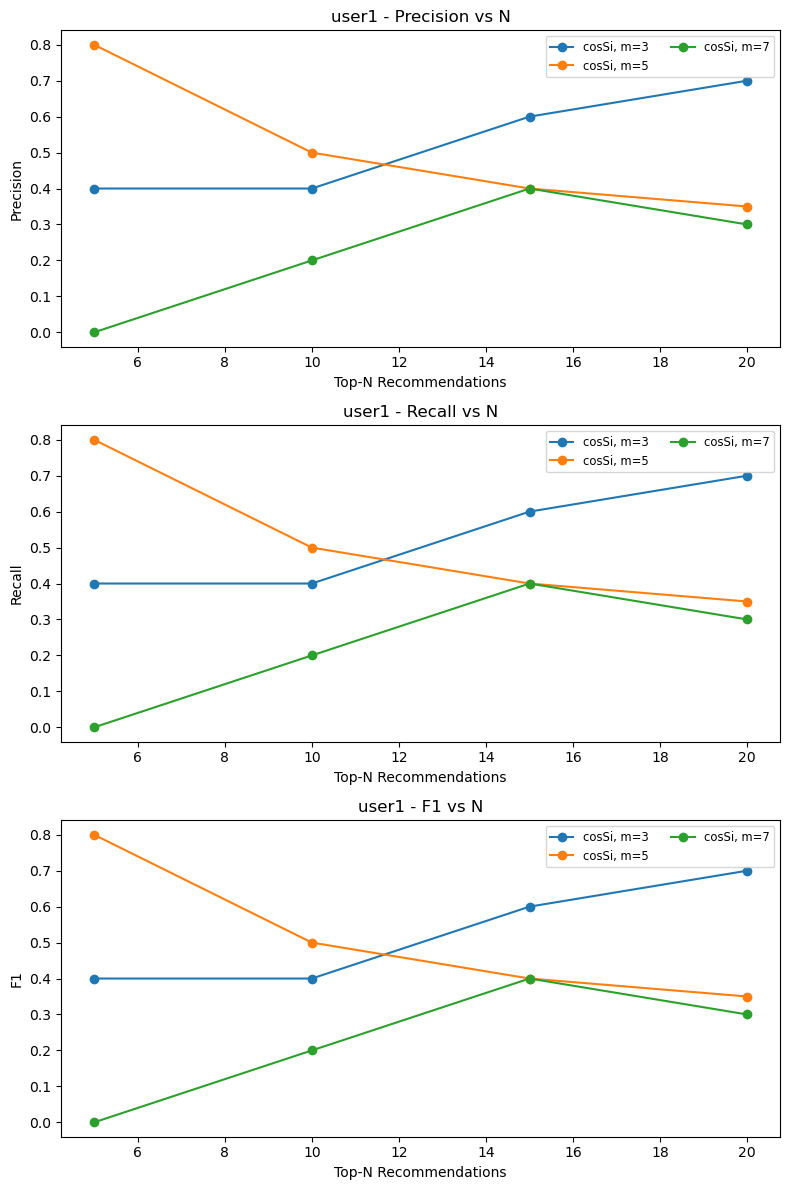

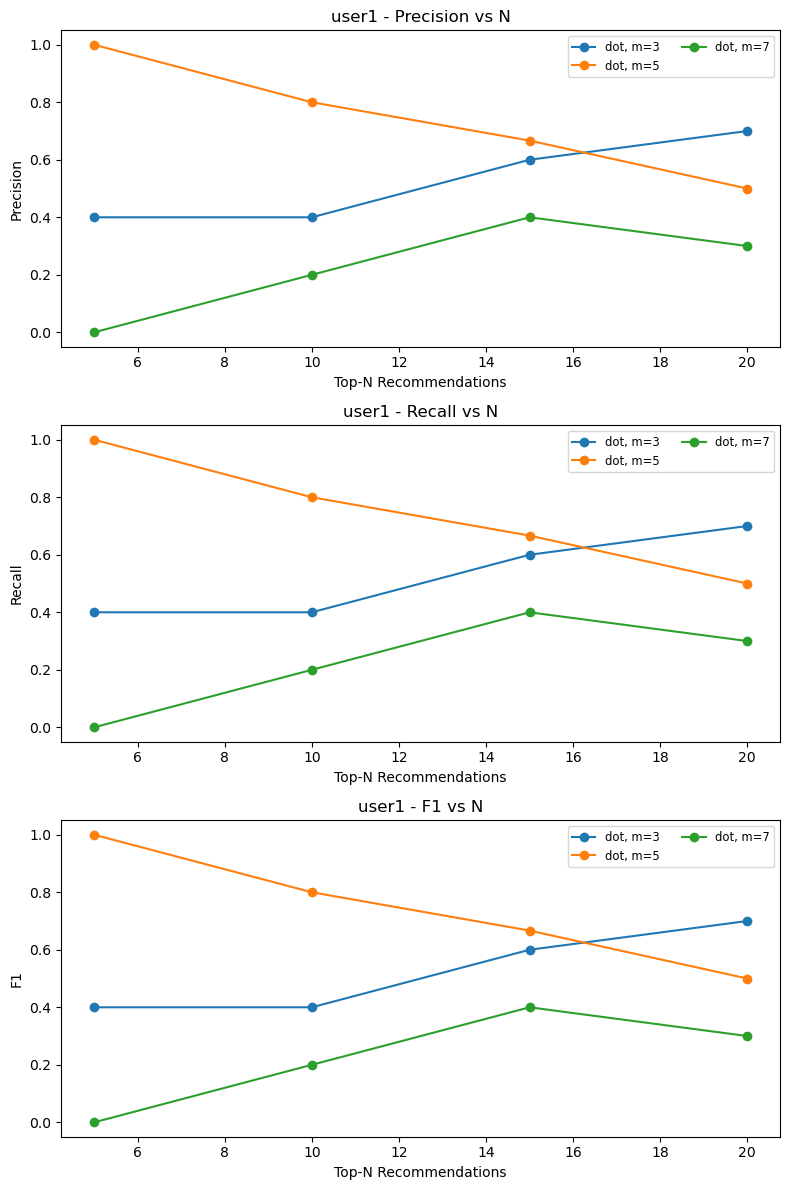

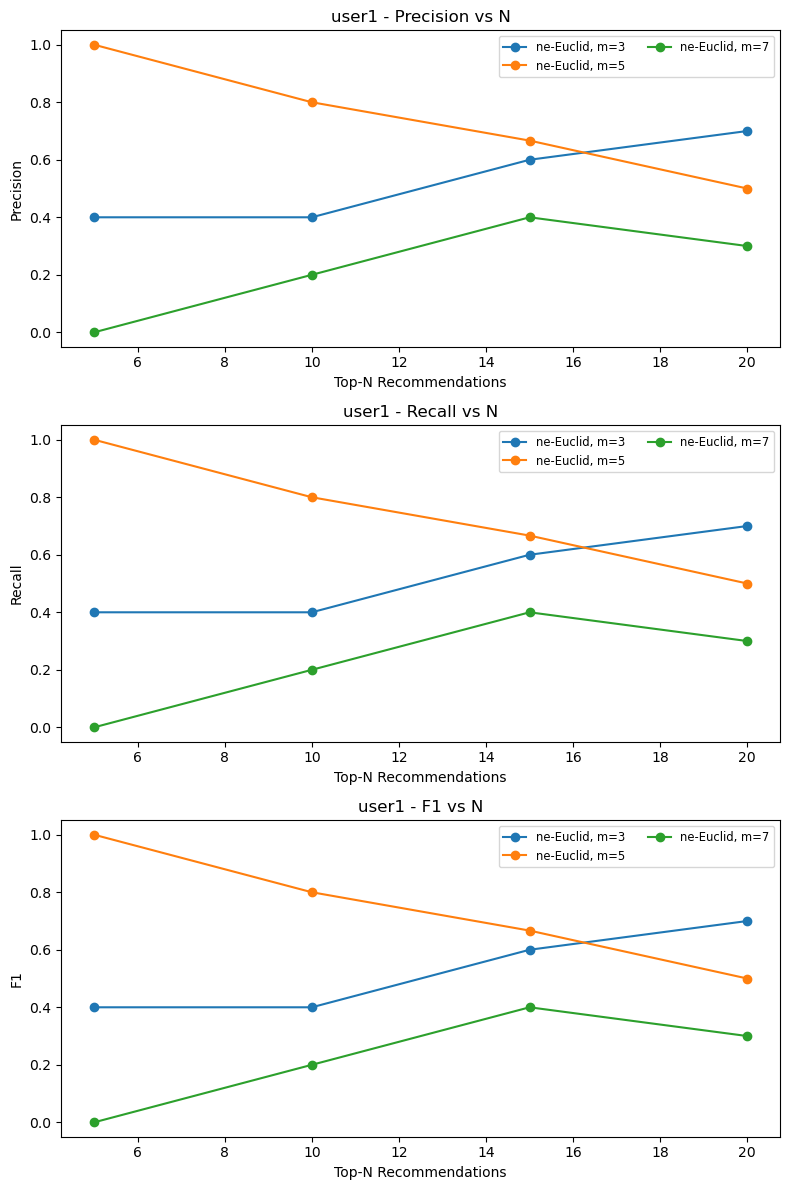

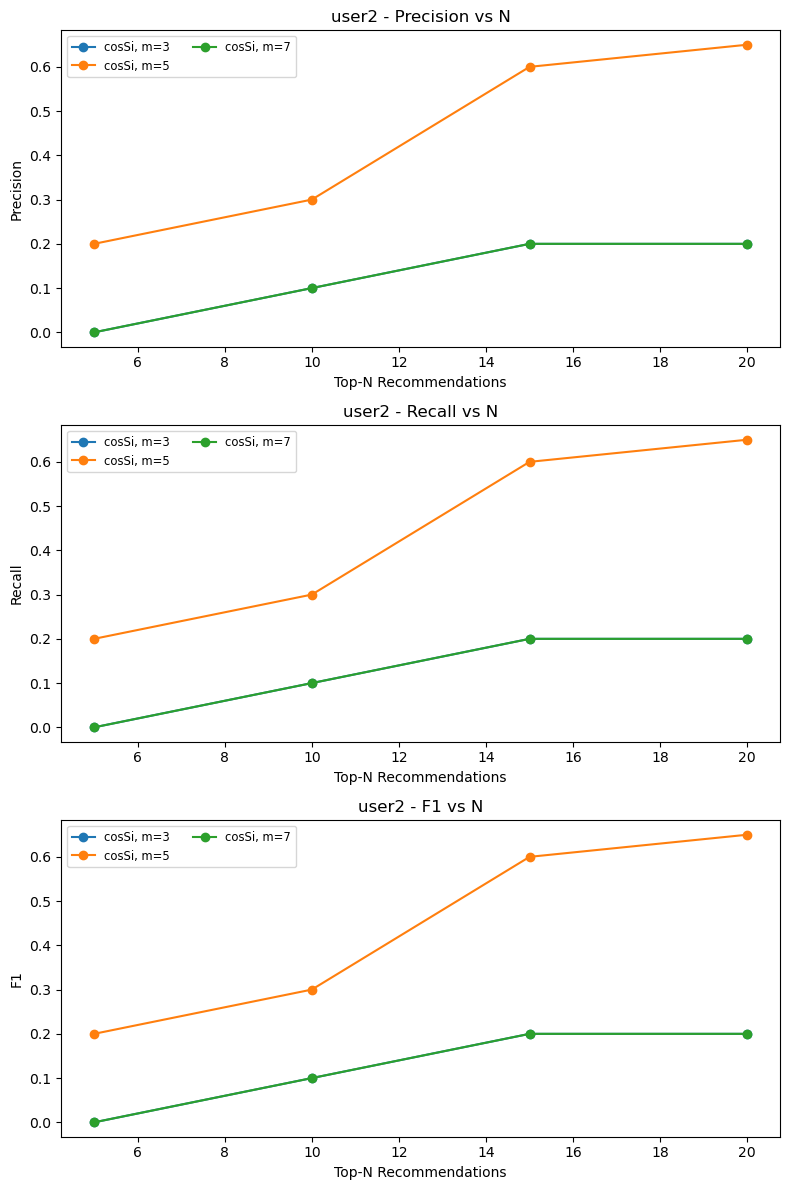

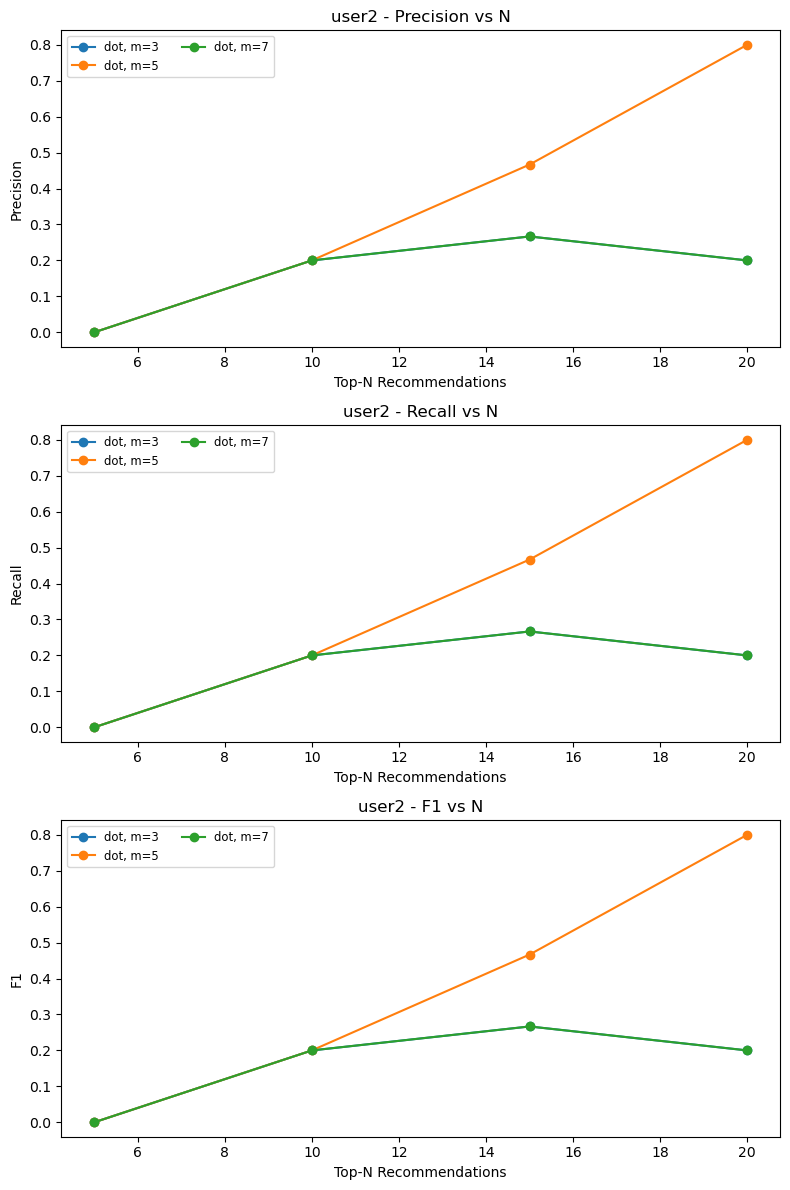

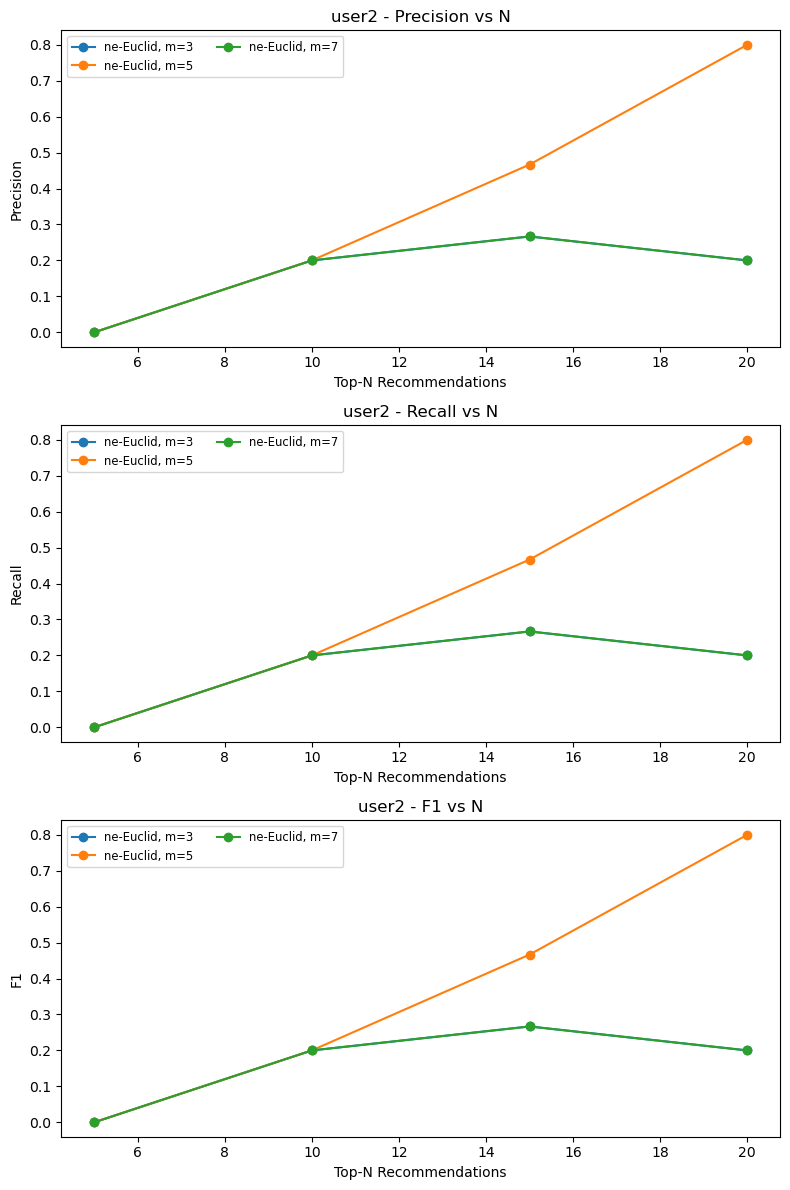

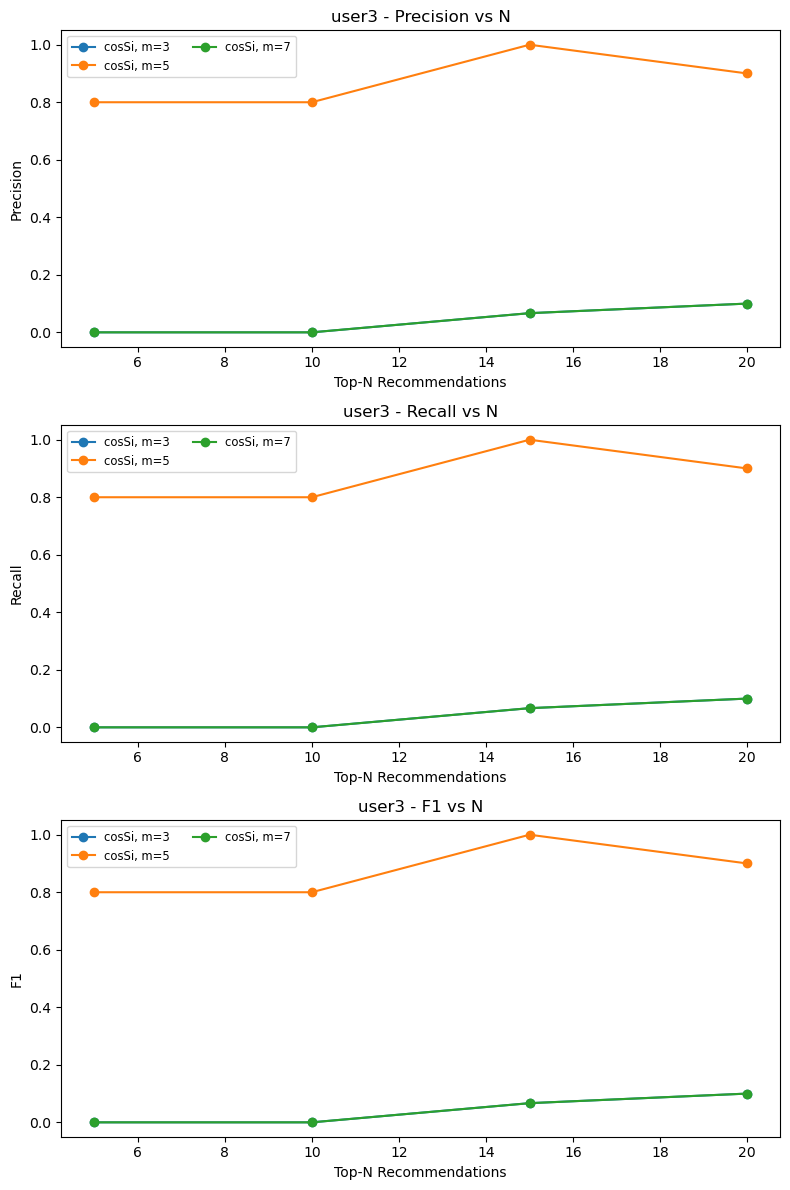

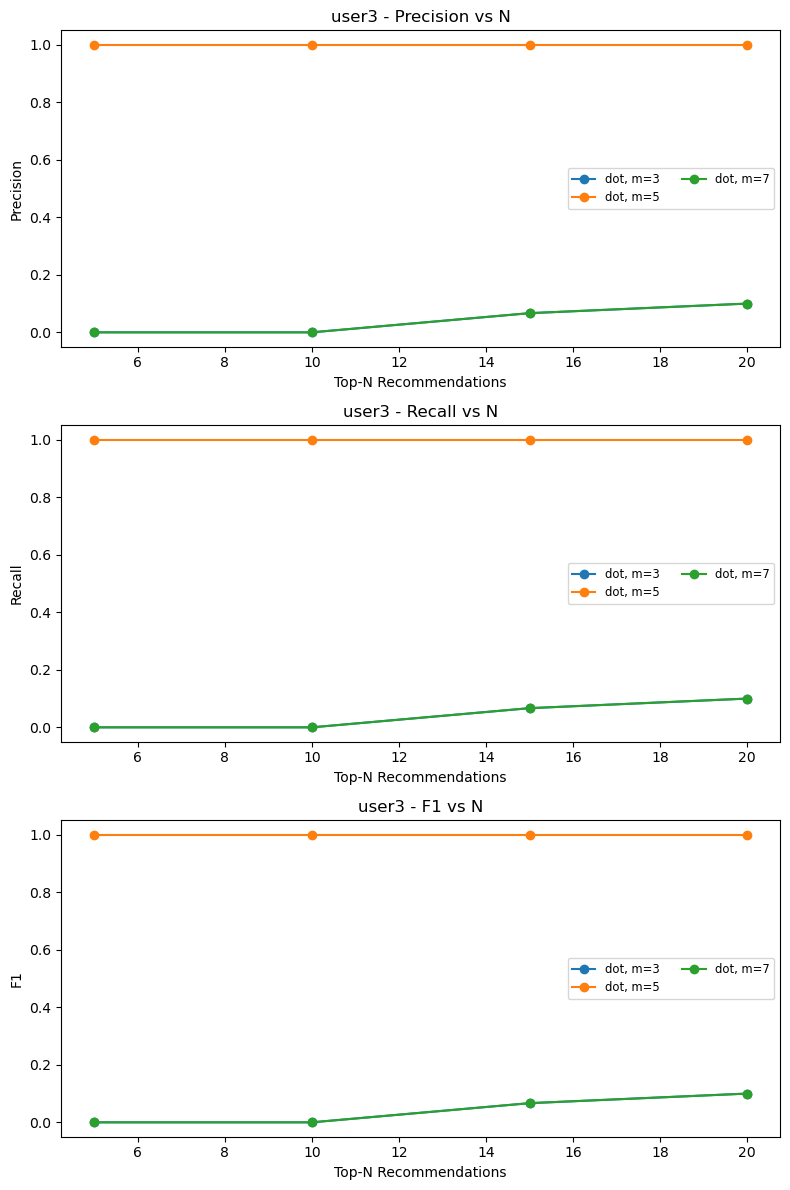

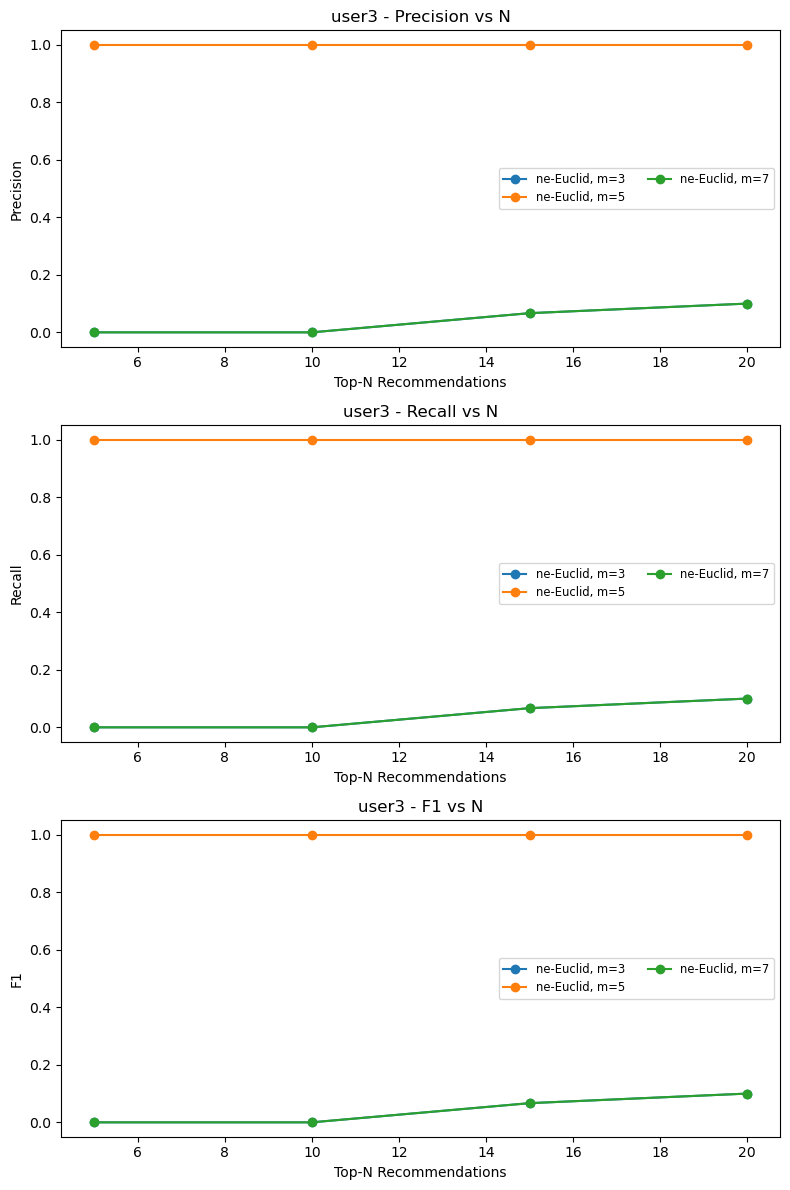

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

allUser = ['user1','user2', 'user3']
allMethod = ['cosSi', 'dot','ne-Euclid']

for user in allUser:


    for method in allMethod:
        df_u = df_res[df_res['name'] == user]
        fig, axes = plt.subplots(3, 1, figsize=(8, 12))
        metrics = ['Precision', 'Recall', 'F1']
    
        for i, metric in enumerate(metrics):
            ax = axes[i]

            for m in allm:
                df_line = df_u[(df_u['method']==method) & (df_u['m']==m)]
                
                ax.plot(df_line['n'], df_line[metric], 
                        marker='o',
                        linestyle='-', 
                        label=f"{method}, m={m}")
            ax.set_xlabel('Top-N Recommendations')
            ax.set_ylabel(metric)
            ax.set_title(f'{user} - {metric} vs N')
            ax.legend(fontsize='small', ncol=2)
        plt.tight_layout()
        plt.show()


For this question,  I selected 3 different algorithms: `dot`, `cosine_similarity`, and `-euclidean_distances` and with different values of `n` and `m`, resulting in a total of 108 rows of data. To make the results more interpretable, I used the ling graphs to indicate that. I noticed that many of the blue lines in the graph were missing, so I printed all the data where `m = 3` in the above.

According to the data, the blue line (`m=3`) frequently overlaps with the green line, indicating similar performance. The tables show that varying `m` and `n` affect the results. In most case, the best performance when `m = 5`, although occasionally `m = 3 ` and `m = 7` yield similar results. 

From `user3`, we can know `dot` and  `-euclidean_distances` have almost identical, while the scores from `cosine_similarity` are consistently a little lower. For the other two users, `dot` and `-euclidean_distances` are similar, but  `cosine_similarity`   demonstrates greater variability and generally worse performance. This may be due to the different number of keywords for users, which could significantly impact the model's ability to recognise user preferences.

Based on these findings, I chose `-euclidean_distances` as the algorithm for user profile construction in Part 3.

## part 3
In this part, I invited a friend to serve as a user for the experiment. First, I used weekx.sample(n=15) to randomly select 15 songs to recommend to the user. Based on the songs they liked, I then created a `tf-idf` matrix and applied `euclidean_distances` to recommend `15` additional songs from week4. 

The decision to use `15` songs was based on findings from the previous question. For `User1`, smaller values of n tended to yield lower performance, while for `User2`, larger values of n resulted in better outcomes. Therefore, I selected `15` as a balanced, intermediate value.

In [40]:
# part 3 
week1P3 = df[1:251]
# print(week1)
week2P3 = df[251:501]
# print(week2)
week3P3 = df[501:751]
# print(week3)

In [41]:
#example
week3Ra = week3P3.sample(n=15)

# week1 recommended songs
### if user_like = 1, it means the user likes this song ###

|index     | artist_name              | track_name             | release_date  | user_like|
|----------|--------------------------|------------------------|---------------|----------|
| 43       | riley richard            | l.i.t.                 | 2018          |          |
| 209      |morcheeba                | never undo              | 2018          |          |
| 98       |aaron shust              | ever be                 | 2016          |          |
| 102      |smile empty soul         | silhouettes             | 2016          |          |
| 110      |death from above 1979    | statues                 | 2017          |          |
| 76       |ty segall                | i worship the dog       | 2019          |          |
| 180      |chris stapleton          | up to no good livin'    | 2017          |  1       |
| 228      |sleeping wolf            | new kings               | 2017          | 1        |
| 187      |janis joplin             | careless love           | 2016          |          |
| 36       |parker millsap           | hades pleads            | 2016          |   1      |
| 173      |santana                  | blue skies              | 2019          |          |
| 95       |the black angels         | medicine                | 2017          |          |
| 24       |t-rock                   | be a g about it         | 2016          |          |
| 67       |311                      | dodging raindrops       | 2019          |  1       |
| 182      |cody johnson             | billy's brother         | 2016          |   1      |


# week2 recommanded songs



| index | artist_name           | track_name                                               | release_date | user_like |
|-------|------------------------|----------------------------------------------------------|---------------|-----------|
| 420   | tim mcgraw             | the rest of our life                                     | 2017          |           |
| 279   | yungblud               | loner                                                    | 2019          |           |
| 387   | magic giant            | window                                                   | 2017          |           |
| 362   | tenth avenue north     | i have this hope                                         | 2016          |    1       |
| 355   | el michels affair      | tearz                                                    | 2017          |           |
| 367   | gary clark jr.         | the governor                                             | 2019          |           |
| 435   | louis armstrong        | life is so peculiar                                      | 2016          |           |
| 274   | melodiesinfonie        | tokyo                                                    | 2018          |           |
| 326   | billie eilish          | bored                                                    | 2017          |    1      |
| 489   | blues saraceno         | kicking and screaming                                    | 2018          |    1       |
| 312   | dorothy                | raise hell                                               | 2016          |    1       |
| 432   | mitch rossell          | ask me how i know                                        | 2019          |           |
| 336   | blake shelton          | go ahead and break my heart (feat. gwen stefani)         | 2016          |     1      |
| 422   | riley green            | that's how ya left me                                    | 2018          |           |
| 446   | soja                   | life support                                             | 2017          |           |


# week3 recommanded songs

| index | artist_name            | track_name                                           | release_date | user_like |
|-------|------------------------|------------------------------------------------------|---------------|-----------|
| 553   | grandson               | apologize                                            | 2019          |           |
| 659   | twenty one pilots      | neon gravestones                                     | 2018          |           |
| 622   | phil wickham           | the secret place                                     | 2016          |           |
| 746   | joe bonamassa          | what i've known for a very long time                | 2016          |           |
| 727   | korn                   | rotting in vain                                      | 2016          |           |
| 611   | the black angels       | life song                                            | 2017          |    1       |
| 687   | tedeschi trucks band   | don’t drift away                                     | 2017          |    1       |
| 693   | seafret                | wildfire                                             | 2016          |  1         |
| 629   | jamie n commons        | low life                                             | 2016          |           |
| 649   | the dear hunter        | gloria                                               | 2016          |           |
| 554   | all them witches       | rob's dream                                          | 2018          |           |
| 565   | twenty one pilots      | chlorine                                             | 2018          |      1     |
| 639   | vampire weekend        | sympathy                                             | 2019          |           |
| 648   | luke bryan             | most people are good                                 | 2017          |     1      |
| 738   | car bomb               | secrets within                                       | 2016          |           |


In [45]:
user_person_like = week3.iloc[[180 ,228,36, 67,182,362, 326, 489 ,312,336 ,611,687,693, 565,  648]]
print(user_person_like.shape)
# print(user_person_like)

(15, 7)


In [46]:
#this part was create user profile, and create tf-idf same with question 2 part 2
def RealPersonfinalAllSongHaveKey(user_person_like,user_lyric):
    topicAllFromPerson = user_person_like['pre_topic'].unique().tolist()
    for topic in topicAllFromPerson:
        allsameTopic = (user_person_like['pre_topic'] == topic)
        goodSonglyr = user_person_like.loc[allsameTopic, 'lyrics']
        user_lyric[topic] = ' '.join(goodSonglyr.tolist())
        
user_Person_allLyrics = {}
RealPersonfinalAllSongHaveKey(user_person_like, user_Person_allLyrics)

for i in user_Person_allLyrics:
    print(f"the topic is {i} and have words {len(user_Person_allLyrics[i])}")

def RealPersonTF(user_Person_allLyrics, user_Person_tfivec):
    for topic, lyric in user_Person_allLyrics.items():
        vec = tfi[topic]['vectorize']
        user_Person_tfivec[topic] = vec.transform([lyric])
        
user_Person_tfivec = {}
RealPersonTF(user_Person_allLyrics, user_Person_tfivec)

print(user_Person_tfivec)

the topic is personal and have words 3789
the topic is dark and have words 3708
the topic is sadness and have words 1138
{'personal': <1x500 sparse matrix of type '<class 'numpy.float64'>'
	with 142 stored elements in Compressed Sparse Row format>, 'dark': <1x500 sparse matrix of type '<class 'numpy.float64'>'
	with 139 stored elements in Compressed Sparse Row format>, 'sadness': <1x500 sparse matrix of type '<class 'numpy.float64'>'
	with 69 stored elements in Compressed Sparse Row format>}


In [47]:
#this this recommend n song according to user tf-idf matrics
def RealPersonTopNSong(week, user_Person_tfivec):

    allSongList = []
    for idx, row in week.iterrows():
        idTopic = row['pre_topic'].strip()
        if idTopic not in user_Person_tfivec:
            continue
       
        # print(idTopic)
        idvec = tfi[idTopic]['vectorize'].transform([row['lyrics']])
        # idSimila = cosine_similarity(idvec, user_Person_tfivec[idTopic])[0,0]
        idSimilaA = -euclidean_distances(idvec, user_Person_tfivec[idTopic])[0,0]
        allSongList.append((idx, idSimilaA))
    allSongList.sort(key=lambda x: x[1], reverse=True)

    songlist = [idx for idx,_ in allSongList]

    return songlist
user_Person_recommondList = RealPersonTopNSong(week4,user_Person_tfivec)
print(user_Person_recommondList[:15])
#I also use cosine_similarity to get recommend song I found there are same recommend song list

[783, 797, 989, 994, 769, 871, 952, 772, 911, 765, 786, 826, 909, 794, 828]


In [48]:
# then we can get recommond list there are
user_Person_recomond = week4.loc[[783, 797, 989, 994, 769, 772, 871, 952, 786, 826, 911, 794, 909, 991, 902]]
print(user_Person_recomond)

                              artist_name                  track_name  \
783  lukas nelson and promise of the real           breath of my baby   
797                         billie eilish                       bored   
989                               solange           cranes in the sky   
994                          the national                 light years   
769                          charlie puth               one call away   
772                     black pistol fire             hearts of habit   
871                     sir charles jones         i'm going down slow   
952                        jonas brothers         don't throw it away   
786            michael franti & spearhead  summertime is in our hands   
826                                 six60                the greatest   
911                     killswitch engage             i am broken too   
794                  tedeschi trucks band              in every heart   
909                         the lumineers          

| index | artist_name                    | track_name                         | release_date | genre  | user_like |
|-------|--------------------------------|------------------------------------|---------------|--------|-----------|
| 783   | lukas nelson and promise...    | breath of my baby                  | 2017          | blues  |           |
| 797   | billie eilish                  | bored                              | 2017          | pop    |     1      |
| 989   | solange                        | cranes in the sky                  | 2016          | pop    |           |
| 994   | the national                   | light years                        | 2019          | rock   |           |
| 769   | charlie puth                   | one call away                      | 2016          | pop    |           |
| 772   | black pistol fire              | hearts of habit                    | 2017          | blues  |           |
| 871   | sir charles jones              | i'm going down slow                | 2016          | blues  |           |
| 952   | jonas brothers                 | don't throw it away                | 2019          | pop    |     1      |
| 786   | michael franti & spearhead     | summertime is in our hands         | 2016          | reggae |           |
| 826   | six60                          | the greatest                       | 2019          | reggae |     1      |
| 911   | killswitch engage              | i am broken too                    | 2019          | rock   |           |
| 794   | tedeschi trucks band           | in every heart                     | 2016          | blues  |    1       |
| 909   | the lumineers                  | walls                              | 2018          | rock   |           |
| 991   | grouplove                      | good morning                       | 2017          | rock   |           |
| 902   | nicole henry                   | moon river                         | 2018          | jazz   |    1       |


In [50]:
same = 5
n = 15
P = same / n
R = same / len(user_week4_like) if user_week4_like else 0.0
F1 = 2 * P * R / (P + R) if (P + R) else 0.0
print(f"for real person p is {P}, R is {R}, and f1 is {F1}")

for real person p is 0.3333333333333333, R is 0.25, and f1 is 0.28571428571428575


In [51]:
print(df.iloc[[797,326]])

       artist_name track_name  release_date genre  \
797  billie eilish      bored          2017   pop   
326  billie eilish      bored          2017   pop   

                                                lyrics     topic  
797  game play stay give beg give need want settle ...  personal  
326  game play stay give beg give need want settle ...  personal  


Finally, based on the model's result, it is evident that the performance was not particularly good. This discrepancy may reflect a gap between theoretical expectations and the real world. This result may be caused by a song choice: for example, my friend was not very interested in English songs and expressed a preference for Japanese songs. This may have influenced the results.

Another potential factor is the algorithm choice: there may be more better algorithm that I have not found. It is also possible that the value of `n` was not large enough to capture sufficient user preferences. In future work, I plan to examine successful recommendation systems to identify which algorithms they use.

Additionally, I discovered that two of the recommended songs were duplicates.